In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import math
import scipy as sp
import scipy.optimize as op
from scipy.interpolate import UnivariateSpline
import os
import sys
from IPython.display import display, Markdown


## Численное дифференцирование

Изучается погрешность методов численного дифференцирования в зависимости \
от шага $h = \frac{2}{2^n}$, $n=\overline{1,21}$.

Методы и функции указаны ниже.

Функции:
- $\sin(x^2)$
- $\cos(\sin(x))$
- $\exp(\sin(\cos(x)))$
- $\ln(x+3)$
- $(x+3)^{0.5}$

Методы:
- $\frac{f(x+h)-f(x)}{h}$
- $\frac{f(x)-f(x-h)}{h}$
- $\frac{f(x+h)-f(x-h)}{2h}$
- $\frac{4}{3}\frac{f(x+h)-f(x-h)}{2h}-\frac{1}{3}\frac{f(x+2h)-f(x-2h)}{4h}$
- $\frac{3}{2}\frac{f(x+h)-f(x-h)}{2h}-\frac{3}{5}\frac{f(x+2h)-f(x-2h)}{4h} + \frac{1}{10}\frac{f(x+3h)-f(x-3h)}{6h}$

In [2]:
# Prepare sympy
x = sym.Symbol('x')
sym.init_printing()

# Create symbolic functions and derivatives
sym_funcs = [
    [sym.sin(x**2), np.arange(0, 2*np.pi, 0.01)],
    [sym.cos(sym.sin(x)), np.arange(0, 2*np.pi, 0.01)],
    [sym.exp(sym.sin(sym.cos(x))), np.arange(0, 2*np.pi, 0.01)],
    [sym.ln(x+3), np.arange(2, 10, 0.01)],
    [(x+3)**0.5, np.arange(0, 10, 0.01)],
]
print("Изучаемые функции:")
dummy = [display(sym_func) for sym_func, rng in sym_funcs]


Изучаемые функции:


Изучаемые методы:


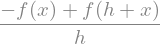

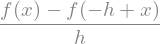

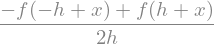

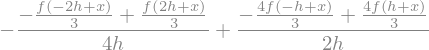

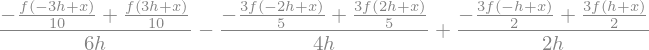

In [4]:
f = sym.Function('f')
h = sym.Symbol('h')

# Create numerical derivation methods
sym_methods = [
    (f(x+h) - f(x))/h,
    (f(x) - f(x-h))/h,
    (f(x+h) - f(x-h))/(2*h),
    sym.Rational('4/3')*(f(x+h) - f(x-h))/(2*h)
        - sym.Rational('1/3')*(f(x+2*h) - f(x-2*h))/(4*h),
    sym.Rational('3/2')*(f(x+h) - f(x-h))/(2*h)
        - sym.Rational('3/5') *(f(x+2*h) - f(x-2*h))/(4*h)
        + sym.Rational('1/10')*(f(x+3*h) - f(x-3*h))/(6*h)
]
print("Изучаемые методы:")
dummy = [display(sym_method) for sym_method in sym_methods]

In [5]:
print("Значения шага h:")
h_range = [2 / 2**n for n in range(1, 21 + 1)]
h_range

Значения шага h:


__________________________________________________
Функция и ее аналитическая производная:


Диапазон изучаемых значений: (0.0, 6.28, 0.01)


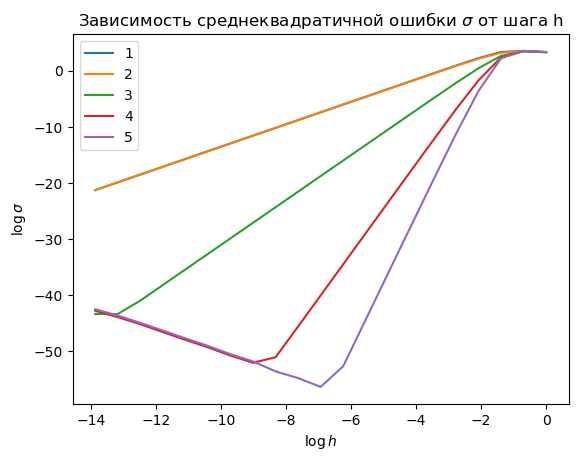

__________________________________________________
Функция и ее аналитическая производная:


Диапазон изучаемых значений: (0.0, 6.28, 0.01)


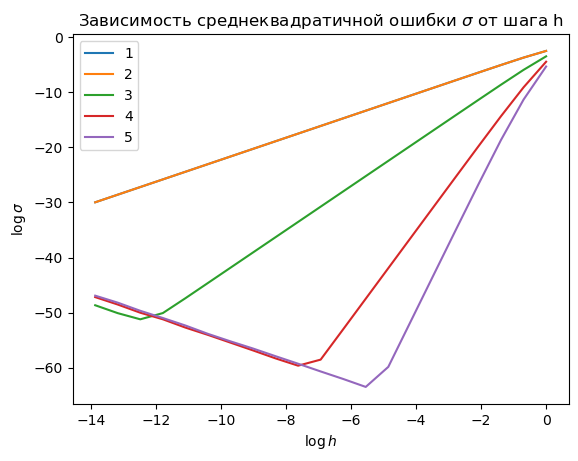

__________________________________________________
Функция и ее аналитическая производная:


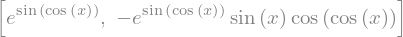

Диапазон изучаемых значений: (0.0, 6.28, 0.01)


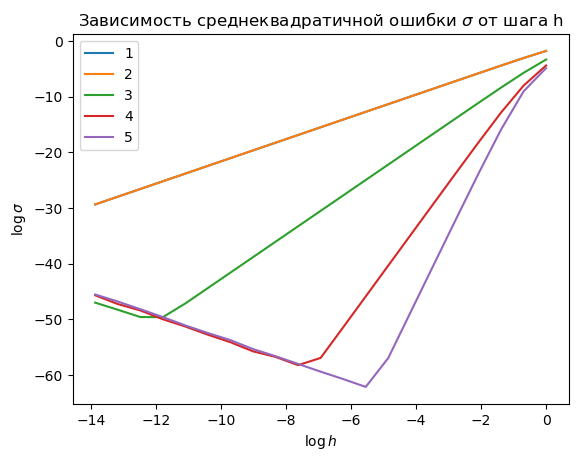

__________________________________________________
Функция и ее аналитическая производная:


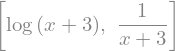

Диапазон изучаемых значений: (2.0, 9.98999999999983, 0.009999999999999787)


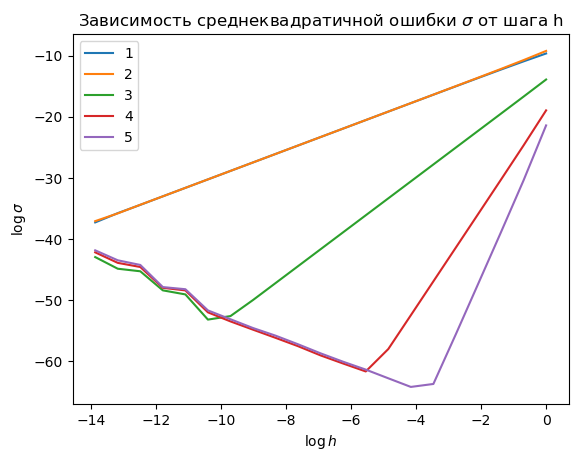

__________________________________________________
Функция и ее аналитическая производная:


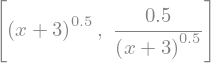

Диапазон изучаемых значений: (0.0, 9.99, 0.01)


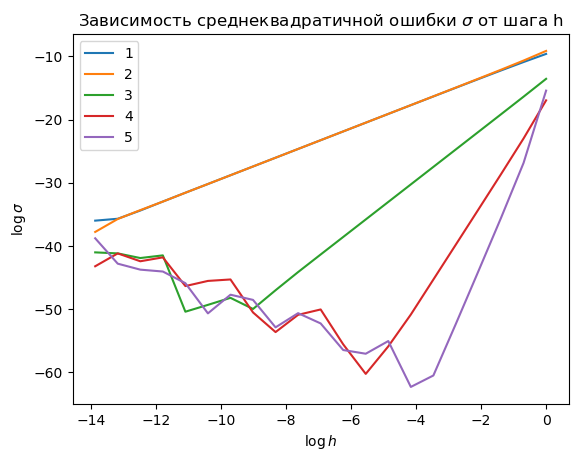

In [12]:
for sym_func, rng in sym_funcs:
    # Analytical derivative
    print('_' * 50)
    print("Функция и ее аналитическая производная:")
    sym_deriv = sym.diff(sym_func, x)
    display([sym_func, sym_deriv])
    print(rf"Диапазон изучаемых значений: ({rng.min()}, {rng.max()}, {rng[1] - rng[0]})")
    
    # Lambda implementing derivative
    deriv = sym.lambdify(x, sym_deriv, "numpy")

    for count, sym_method in enumerate(sym_methods, start=1):
        # Replace arbitrary 'f()' with required function
        subbed_method = sym_method.replace(f, lambda arg: sym_func.subs(x, arg))
        # print(f"Method {count}:")
        # display(subbed_method)

        mse = []
        for h_value in h_range:
            # Lambda implementing numerical method
            tmp = subbed_method.subs(h, h_value)
            method = sym.lambdify(x, tmp, "numpy")

            # Calculate mean squared error (sigma)
            mse.append(sum((deriv(rng) - method(rng))**2) / len(rng))
        
        # print(mse)
        plt.plot(np.log(h_range), np.log(mse), label=rf"{count}")

    plt.legend()
    plt.xlabel(r"$\log h$")
    plt.ylabel(r"$\log \sigma$")
    plt.title(r"Зависимость среднеквадратичной ошибки $\sigma$ от шага h")
    plt.show()